In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as pyplot

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv(r'C:\Users\mehta\Downloads\Breast_cancer_data.csv')
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3]].values
data.info()
#data[0:10]

data.head()

Dataset : (569, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
data.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


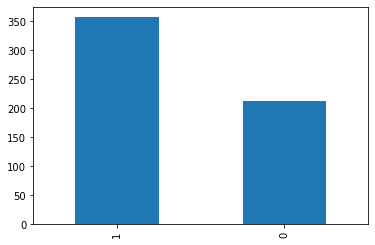

In [6]:
data.diagnosis.value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:>

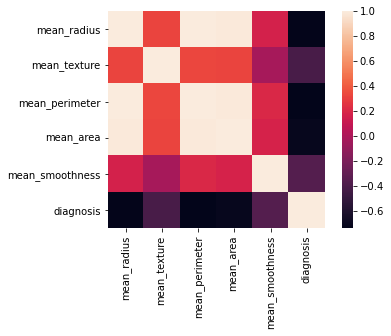

In [7]:
data = data[['mean_radius','mean_texture','mean_perimeter','mean_area', 'mean_smoothness','diagnosis']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

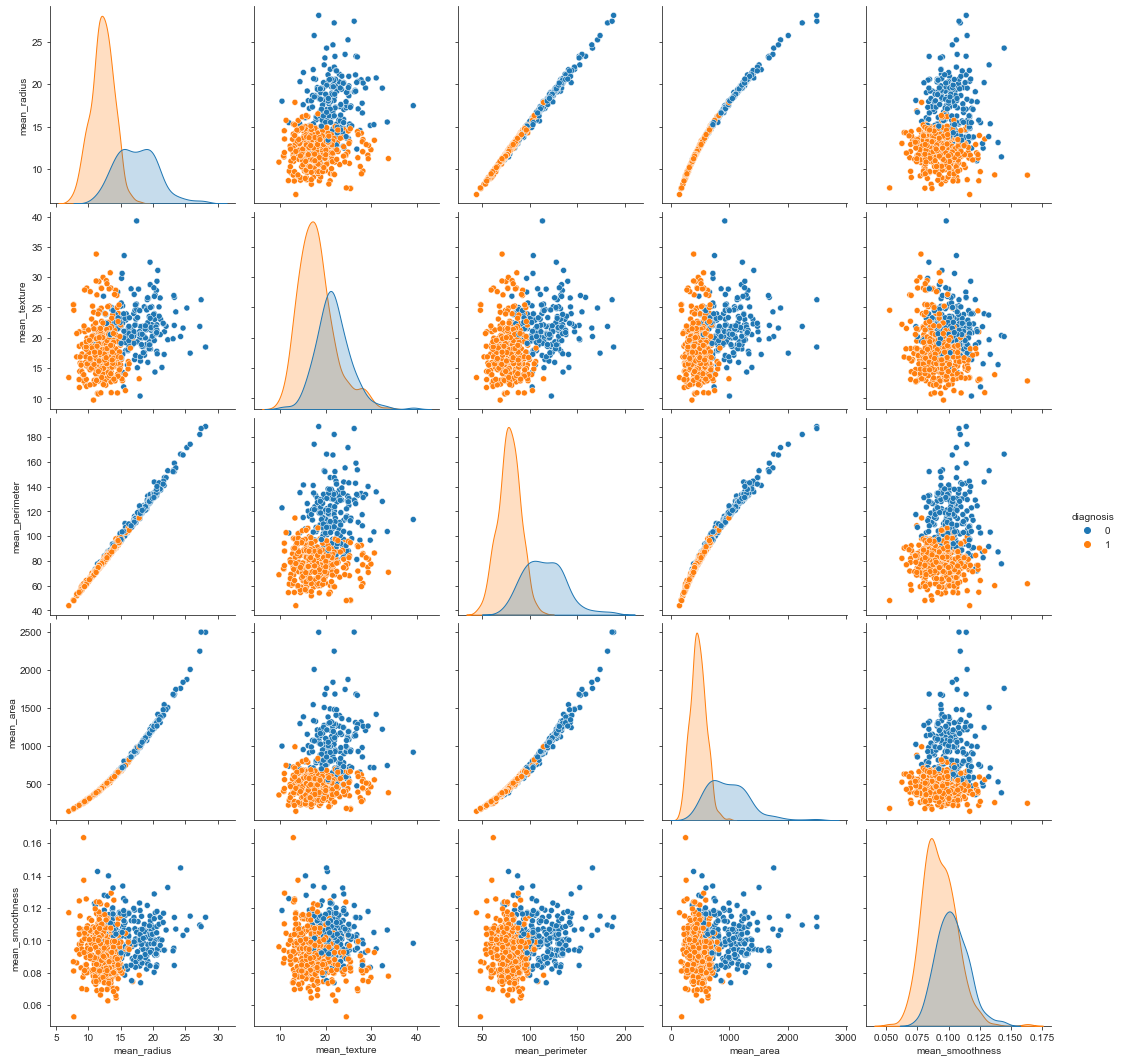

In [8]:
sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis",height=3);
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [10]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


In [11]:
# SVM (Support Vector Machine) classification
# SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function)  y=f(x)  between some high-dimensional input vector  x  and scalar output  y . It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set  D=(xi,yi)∈X×Y,i=1 ,  l , where  l  stands for the number of the training data pairs and is therefore equal to the size of the training data set  D , additionally,  yi  is denoted as  di , where  d  stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.
# From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = SVC()

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

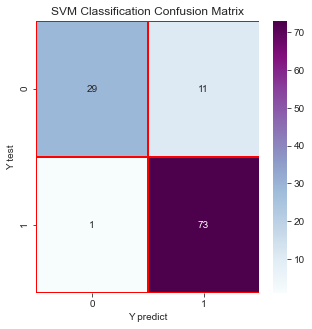

In [13]:
# The confusion matrix
from sklearn import metrics


svmcla_cm = metrics.confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


acc = {}

In [14]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

acc['Support Vector Machine'] = score_svmcla


0.8947368421052632


In [15]:
# Random forest classification
# Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

# Let  N  be the number of test cases,  M  is the number of variables in the classifier.
# Let  m  be the number of input variables to be used to determine the decision in a given node;  m<M .
# Choose a training set for this tree and use the rest of the test cases to estimate the error.
# For each node of the tree, randomly choose  m  variables on which to base the decision. Calculate the best partition of the training set from the  m  variables.
# For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(random_state = 9 , bootstrap = True)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

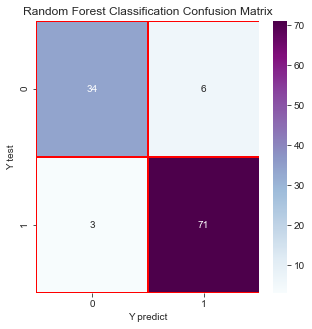

In [17]:
# The confusion matrix
from sklearn import metrics
rfcla_cm = metrics.confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [18]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

acc['Random Forest'] = score_rfcla

0.9210526315789473


In [19]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=20)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

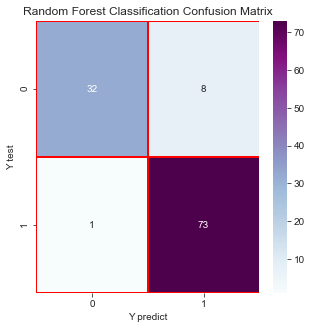

In [20]:
from sklearn import metrics
logreg_cm = metrics.confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [21]:
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)
acc['Logistic Regression'] = score_logreg

0.9210526315789473


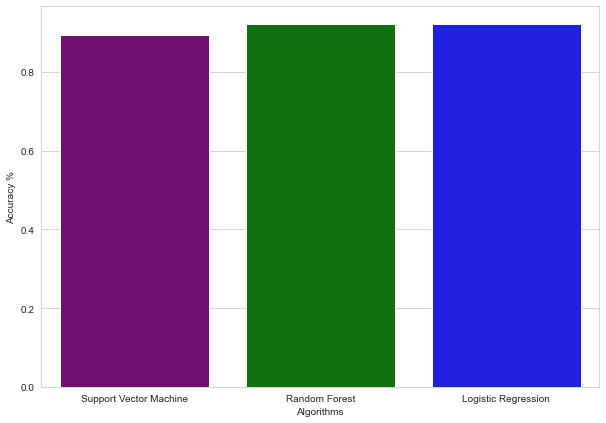

In [22]:
colors = ["purple", "green" , "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(acc.keys()), y=list(acc.values()), palette=colors)
plt.show()

In [23]:
# evaluate a logistic regression model using repeted k-fold cross-validation

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold



In [24]:
# evaluate a logistic regression model using repeted k-fold cross-validation

cvLogreg = {}

max_logreg = 0

for i in range(0 , 10) :
    
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, random_state=1,n_repeats=i+1)
    # create model
    model_logreg = LogisticRegression()
    # evaluate model
    score_cv_logreg = cross_val_score(model_logreg, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(score_cv_logreg), std(score_cv_logreg)))
    
    if(max_logreg < mean(score_cv_logreg)) :
        max_logreg = mean(score_cv_logreg)
    
        
    cvLogreg[str(i)] = mean(score_cv_logreg)

# score_logreg = logreg.score(X_test, Y_test)
# print(score_logreg)
print(max_logreg)
acc['Logistic Regression CV'] = max_logreg

0.912108395989975


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy %'>

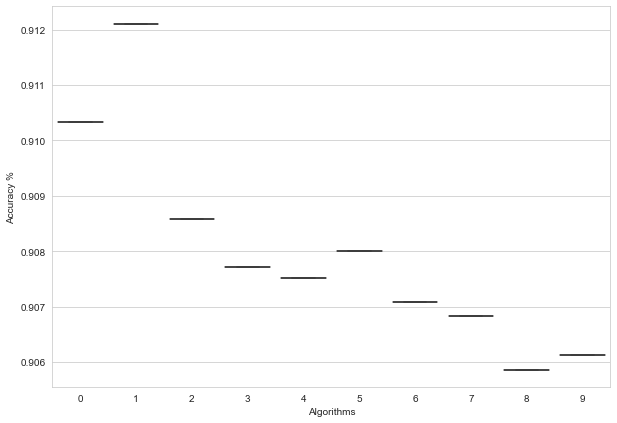

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
#plt.yticks(np.arange(0,10,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.boxplot(x=list(cvLogreg.keys()), y=list(cvLogreg.values()))

In [26]:
# evaluate a Support Vector Machine model using repeted k-fold cross-validation

cvSvm = {}

max_Svm = 0

for i in range(0 , 10) :
    
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, random_state=1, n_repeats=i+1)
    # create model
    model_Svm = SVC()
    # evaluate model
    score_cv_Svm = cross_val_score(model_Svm, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(score_cv_logreg), std(score_cv_logreg)))
    
    if(max_Svm < mean(score_cv_Svm)) :
        max_Svm = mean(score_cv_Svm)
        
    cvSvm[str(i)] = mean(score_cv_Svm)

# score_logreg = logreg.score(X_test, Y_test)
# print(score_logreg)
print(max_Svm)
acc['Support Vector Machine CV'] = max_Svm

0.8866384711779448


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy %'>

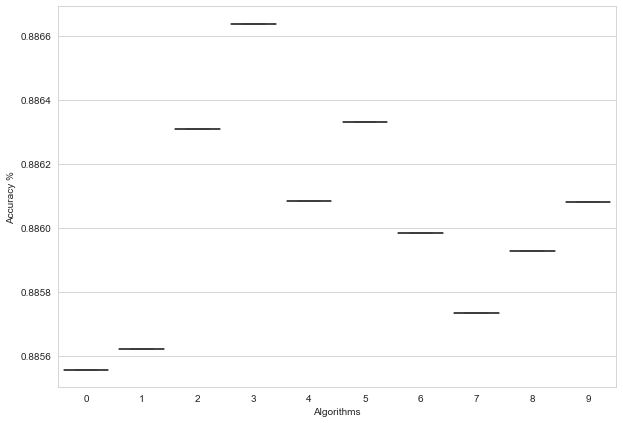

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.boxplot(x=list(cvSvm.keys()), y=list(cvSvm.values()))

In [28]:
# evaluate a Random Forest model using repeted k-fold cross-validation

cvRf = {}

max_Rf = 0

for i in range(0 , 10) :
    
    cv = RepeatedKFold(n_splits=10, random_state=1, n_repeats=i+1)
    # create model
    model_Rf = RandomForestClassifier()
    # evaluate model
    score_cv_Rf = cross_val_score(model_Rf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    #print('Accuracy: %.3f (%.3f)' % (mean(score_cv_logreg), std(score_cv_logreg)))
    
    if(max_Rf < mean(score_cv_Rf)) :
        max_Rf = mean(score_cv_Rf)
        
    cvRf[str(i)] = mean(score_cv_Rf)


print(max_Rf)
acc['Random Forest CV'] = max_Rf

0.9279448621553884


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy %'>

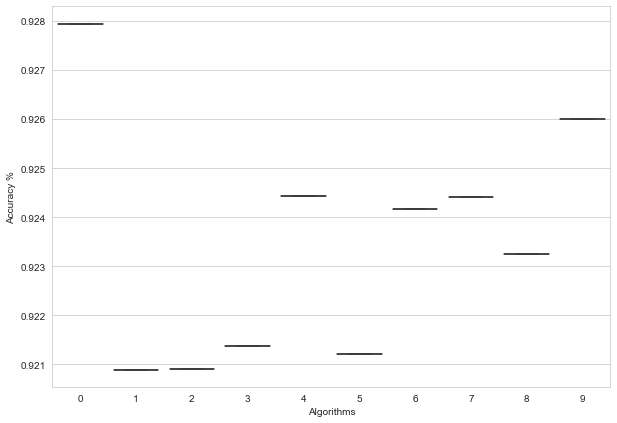

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.boxplot(x=list(cvRf.keys()), y=list(cvRf.values()))

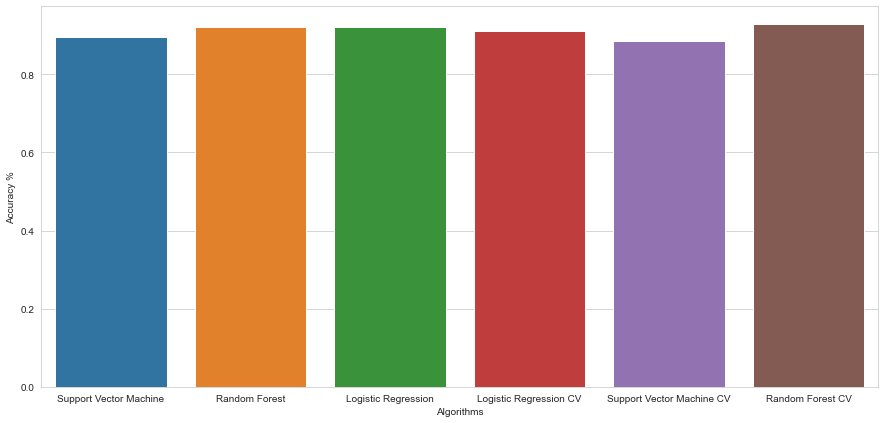

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
#plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(acc.keys()), y=list(acc.values()))
plt.show()